In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.dvidtt.046001-046912.nc')

In [3]:
plotvar = data.variables['dvidtt'][:,0:600,0:3600]
lont = data.variables['TLON'][0:600,0:3600]
latt = data.variables['TLAT'][0:600,0:3600]
aveplot = np.nanmean(plotvar,axis=0)

In [4]:
# 63-68,,, 
lont2 = lont[247:365,1100]
latt2 = latt[247:365,1100]
lont3 = lont[247:365,800]
latt3 = latt[247:365,800]
lont4 = lont[247,800:1100]
latt4 = latt[247,800:1100]
lont5 = lont[365,800:1100]
latt5 = latt[365,800:1100]

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'spacing'
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


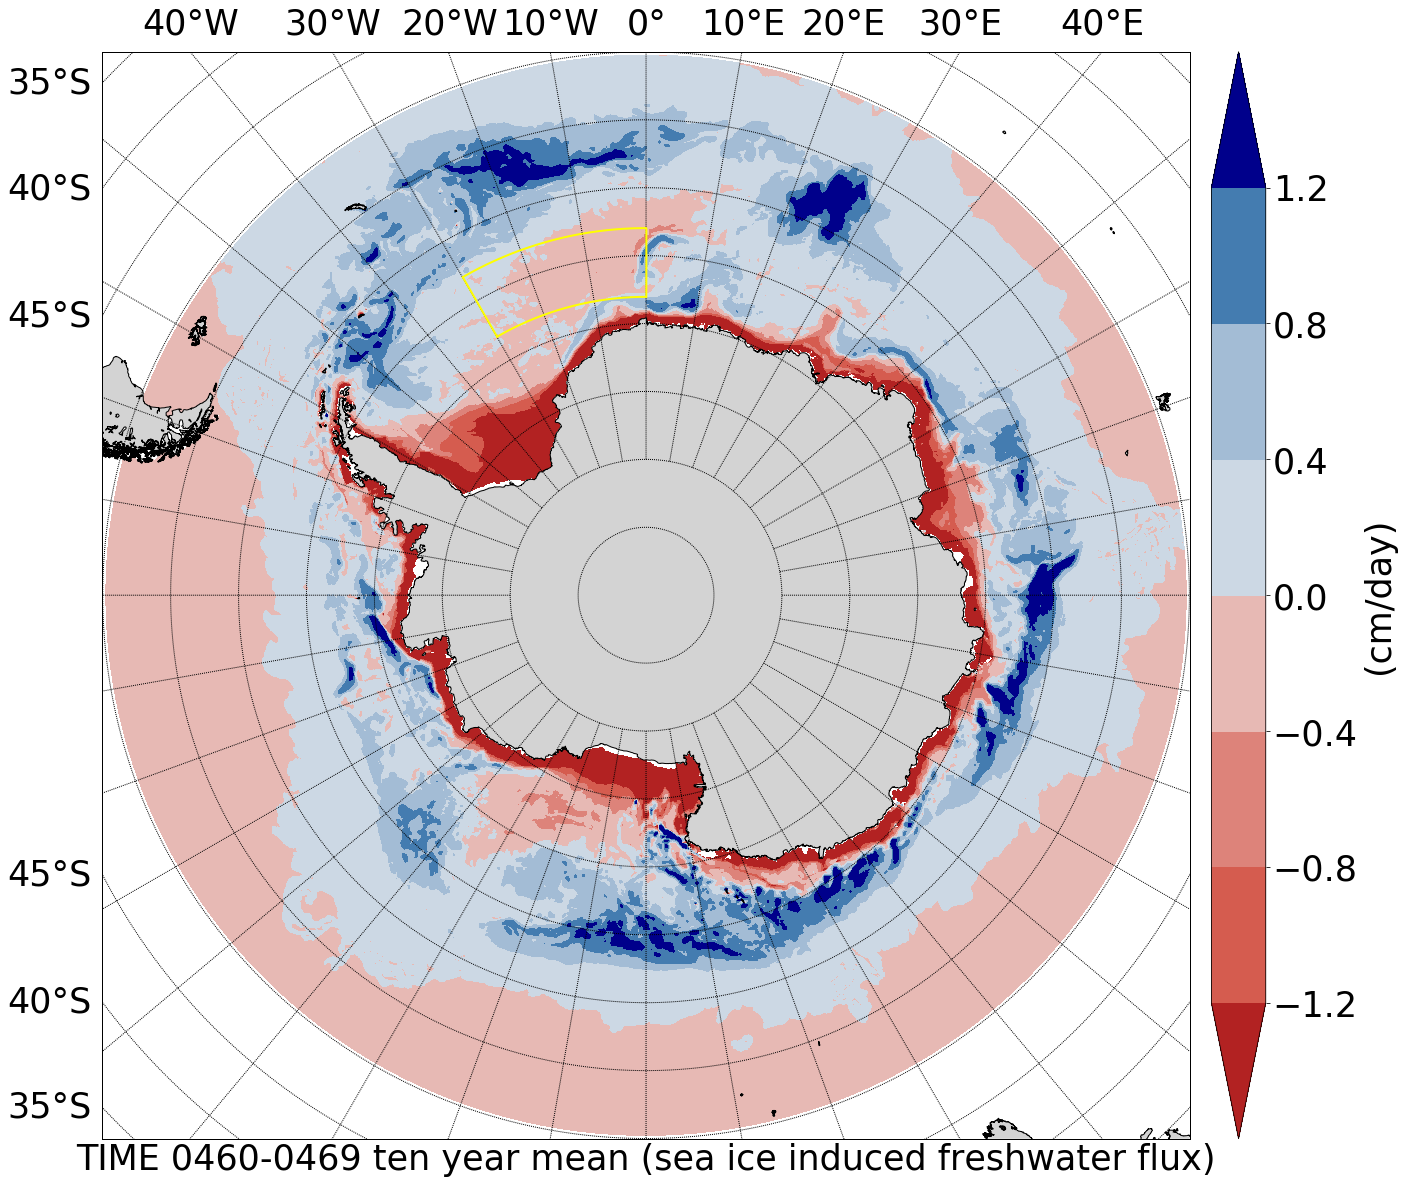

In [5]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
#lev_cmap = nice_cmap([1,30,50,70,80,100,130,140,150,170,190,210,230,240]) 
lev_cmap = nice_cmap([240,230,210,190,170,140,130,100,80,70,50,30,1])
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-1.2,-0.8,-0.4,0,0.4,0.8,1.2]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'35'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,-aveplot*365/100*917/1000,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('darkblue')
CP.cmap.set_under('firebrick')


x2,y2=map(lont2,latt2)
map.plot(x2,y2,'yellow',linewidth=2)
x3,y3=map(lont3,latt3)
map.plot(x3,y3,'yellow',linewidth=2)
x4,y4=map(lont4,latt4)
map.plot(x4,y4,'yellow',linewidth=2)
x5,y5=map(lont5,latt5)
map.plot(x5,y5,'yellow',linewidth=2)
#CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=35)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks=nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=35) 
cbar.set_label('(cm/day)', **my_font)
plt.xlabel("TIME 0460-0469 ten year mean (sea ice induced freshwater flux)",**my_font)
plt.savefig("460year.png")

In [6]:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.KMT.nc')
        plotvar = data.variables['KMT'][:,:]

In [7]:
        datau=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.UVEL.nc')
        plotvaru = datau.variables['UVEL'][0,1,:,:]
        lontu = datau.variables['ULONG'][:,:]
        lattu = datau.variables['ULAT'][:,:]

In [8]:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.z_w_bot.nc')
        plotvar2 = data.variables['z_w_bot'][:]

In [9]:
depth = plotvar2/100

In [10]:
num = np.arange(1,62)

In [11]:
for i in num: 
    plotvar[plotvar==i] = depth[i]

In [12]:
plotvar[plotvar==0] = -1
lontu[lontu ==-1] = np.nan
lattu[lattu ==-1] = np.nan
lontu[:,1089] = -1

In [13]:
lont2 = lontu[200:410,1130]
latt2 = lattu[200:410,1130]

In [14]:
re = np.loadtxt("ridgevelocity.out")
xx = np.loadtxt("ridgevelocityxx.out")
yy = np.loadtxt("ridgevelocityyy.out")

In [15]:
xx[0,:]

array([ -1.        ,  -1.        ,  -1.        ,  -1.        ,
        -1.        ,  -1.        ,  -1.        ,  -1.        ,
        -1.        ,  -1.        ,  -1.        ,  -1.        ,
        -1.        ,  -1.        ,  -1.        ,  -1.        ,
        -1.        ,  -1.        ,  -1.        ,  -1.        ,
        -1.        ,  -1.        ,  -1.        ,  -1.        ,
        -1.        ,  -1.        ,  -1.        ,  -1.        ,
        -1.        ,  -1.        ,  -1.        ,  -1.        ,
        -1.        ,  -1.        ,  -1.        ,  -1.        ,
        -1.        ,  -1.        ,  -1.        ,  -1.        ,
        -1.        ,  -1.        ,  -1.        ,  -1.        ,
        -1.        ,  -1.        ,  -1.        ,  -1.        ,
        -1.        ,  -1.        ,  -1.        ,  -1.        ,
        -1.        ,  -1.        ,  -1.        ,  -1.        ,
        -1.        ,  -1.        ,  -1.        ,  -1.        ,
        -1.        ,  -1.        ,  -1.        ,  -1.  

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: The following kwargs were not used by contour: 'spacing'
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'spacing'
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


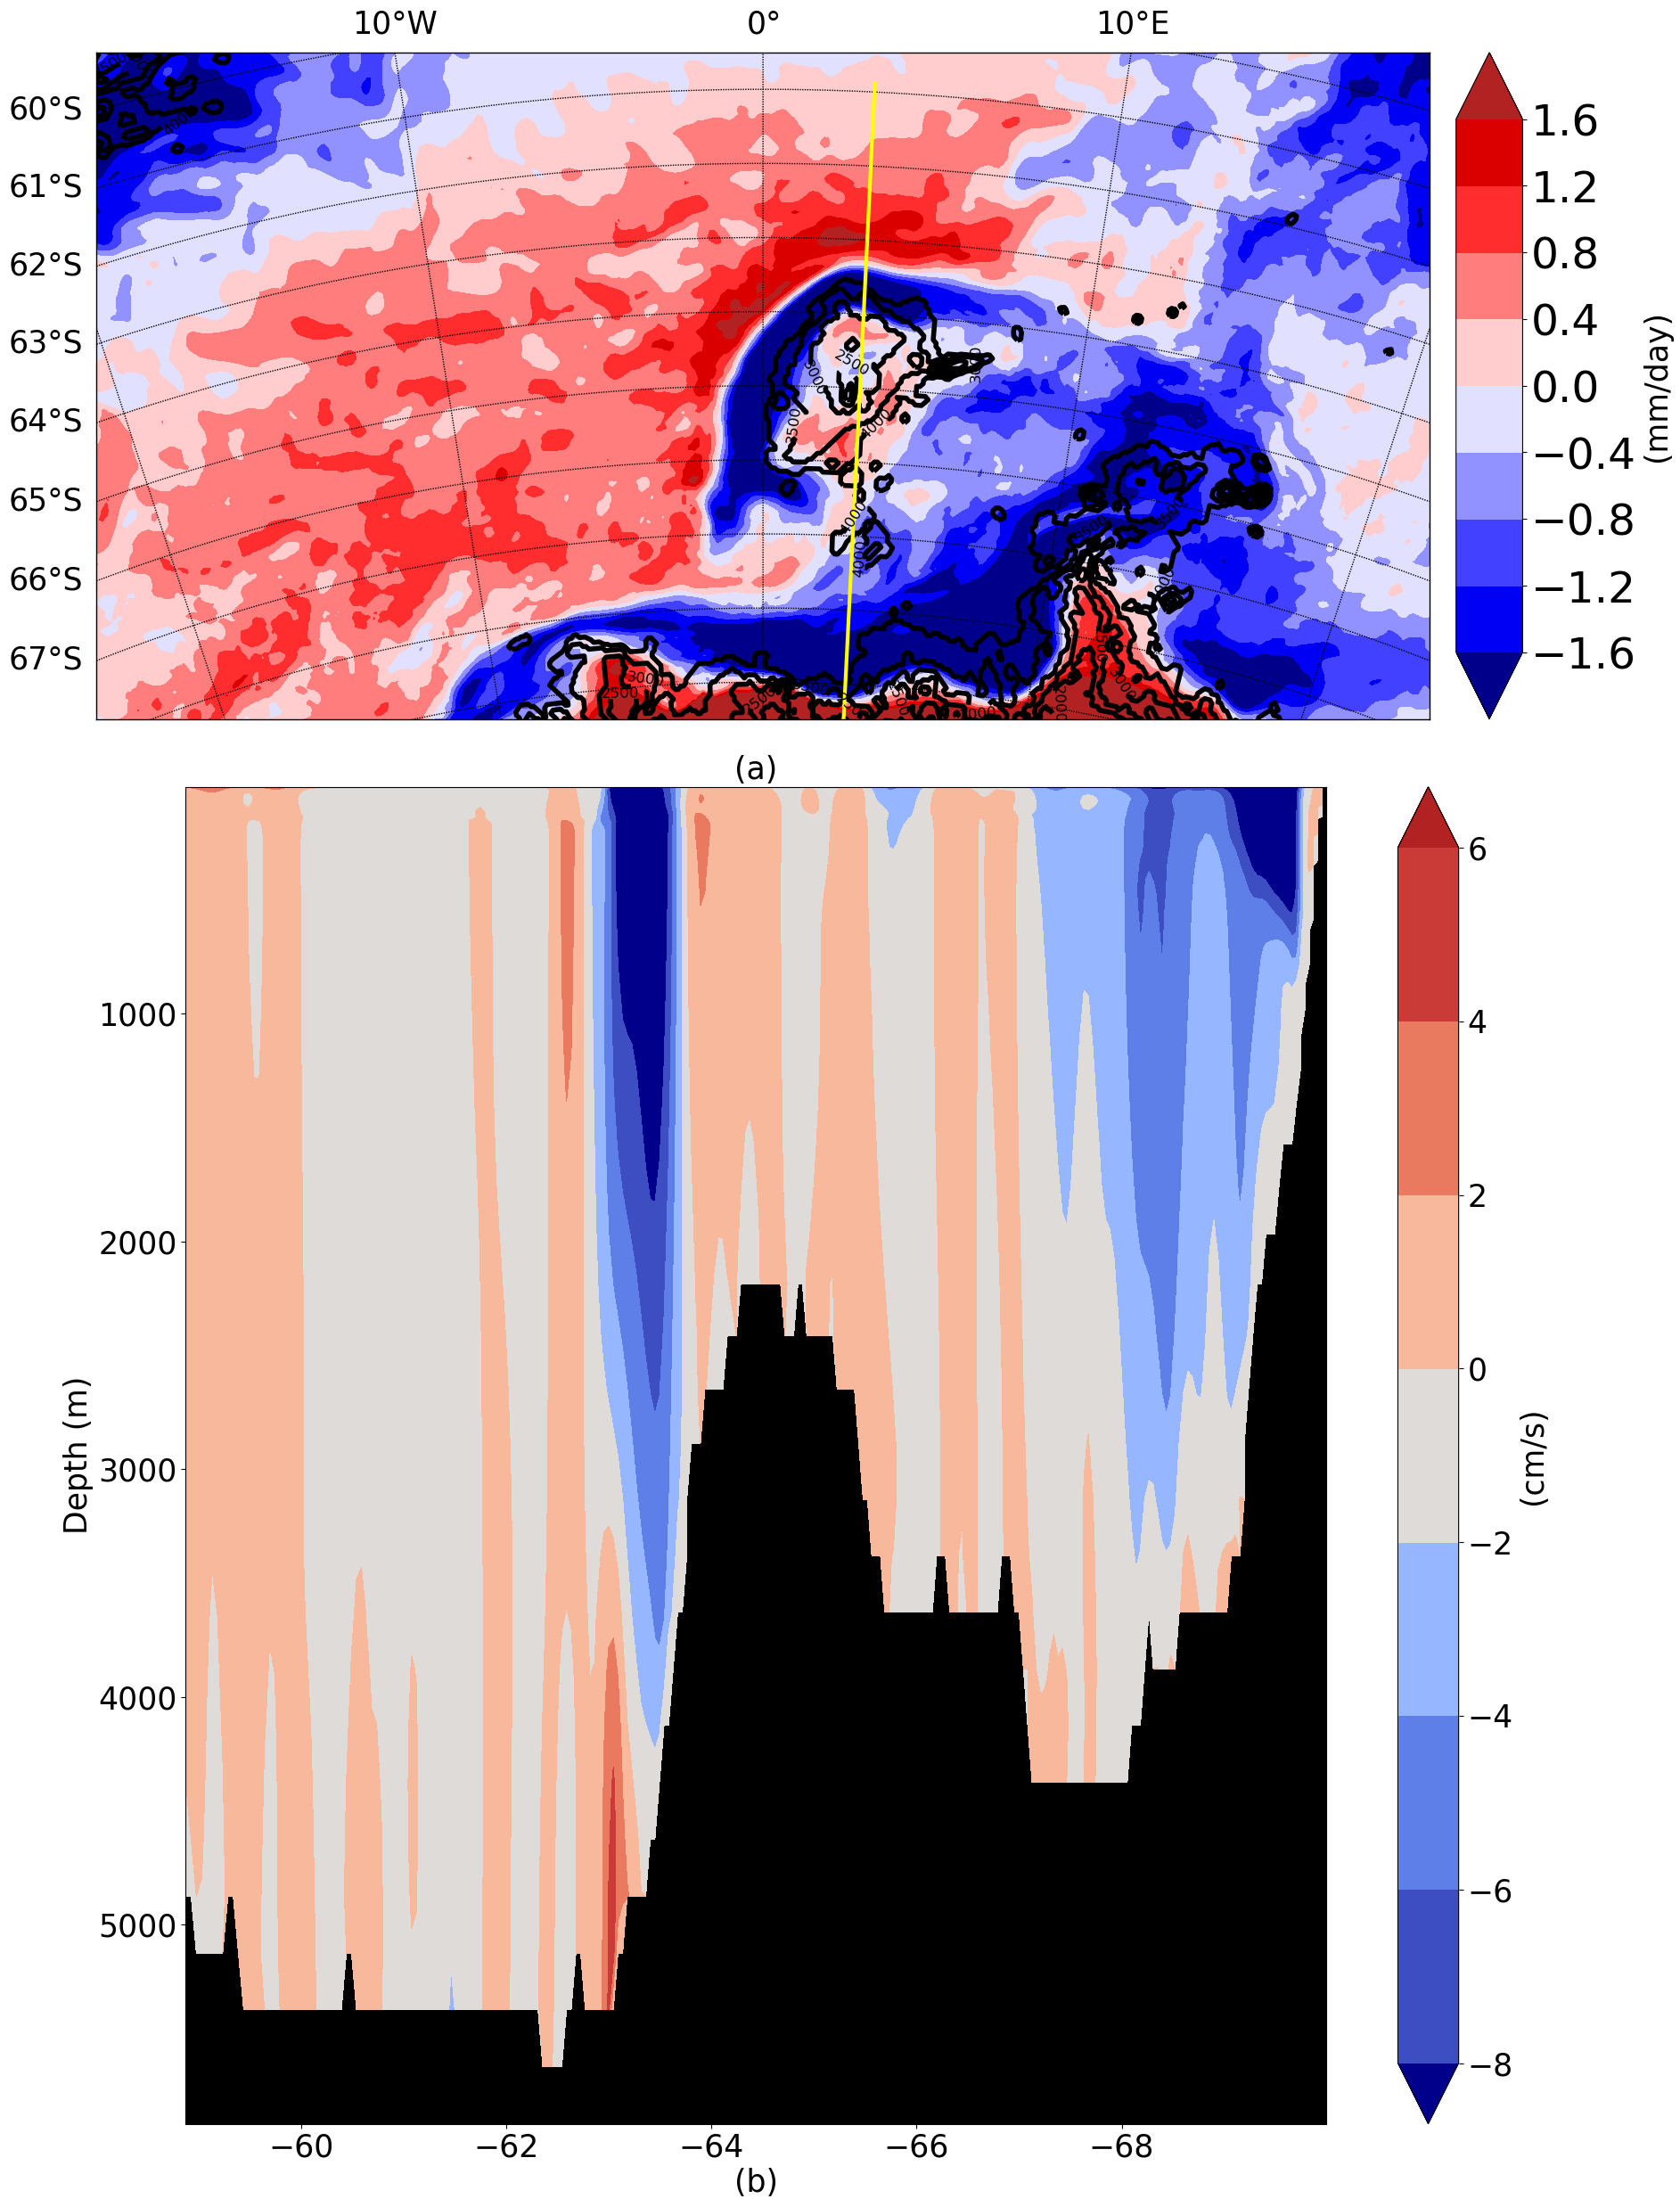

In [16]:
        
    ##################################################################
        fig = plt.figure(figsize=(20,30), dpi=100)
        ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.4],
                    xticklabels=[])
        nice_cmap=plt.get_cmap('seismic')
        lev_cmap = nice_cmap([60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210])
        new_cmap = cols.ListedColormap(lev_cmap,"seismic")
        nice_levels = [-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6]
        #nice_levels = [-5,-4,-3,-2,-1,0,1,2,3,4,5] 
        norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
        #********************************************************************nice_levels = [-4,-3,-2,-1,0,1,2,3,4]    
        nice_levels2 = [2000,2500,3000,3500,4000]
        #plt.figure(figsize=(25,20))
        my_font = {'fontname':'Cambria', 'size':'25'}

        map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 2000000,height = 1000000,resolution ='h') 
        map.drawcoastlines()
        map.fillcontinents(color = 'grey')
        map.drawmapboundary(color='black')
 
        map.drawparallels(np.arange(-90,91,1),labels=[1,0,0,0],**my_font)
        map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)
        x2,y2=map(lont2,latt2)
        map.plot(x2,y2,'yellow',linewidth=3)
       
        xq,yq=map(lontu,lattu)
  
        CS = map.contour(xq,yq,plotvar,levels = nice_levels2,colors= 'black',linestyles = 'solid',linewidths=4)
        plt.clabel(CS,fontsize=12,fmt='%4d')
        x,y=map(lont,latt)
        CP2 = map.contourf(x,y,aveplot*10,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
        CP2.cmap.set_over('firebrick')
        CP2.cmap.set_under('darkblue')
        cbar =map.colorbar(CP2,extendfrac='auto',ticks=nice_levels)
        cbar.ax.tick_params(labelsize=35)
        cbar.set_label('(mm/day)', **my_font)
        
        ax2 = fig.add_axes([0.15, 0.45, 0.8, 0.5])
        my_font = {'fontname':'Cambria', 'size':'25'}
        nice_cmap=plt.get_cmap('coolwarm')
        lev_cmap = nice_cmap([1,30,50,70,100,130,150,170,190,210,230,240]) 
        new_cmap = cols.ListedColormap(lev_cmap,"coolwarm")
        nice_levels = [-8,-6,-4,-2,0,2,4,6]
        norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

        im = ax2.contourf(xx[:,200:450], yy[:,200:450], re[:,200:450],cmap=new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
        im.cmap.set_over('firebrick')
        im.cmap.set_under('darkblue')
        ax2.set_facecolor("black")
        #plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
        #ax0.imshow(np.where(plotvar.mask)[0],np.where(plotvar.mask)[1])
        #CS = ax0.contour(xx[:45,:], yy[:45,:], PD[:45,:],colors = 'black', linestyles = 'solid',linewidths=3)
        #plt.clabel(CS,fontsize=20)
        cbar = fig.colorbar(im, ax=ax2,ticks=nice_levels,spacing='uniform')
        cbar.ax.tick_params(labelsize=25)
        cbar.set_label('(cm/s)', **my_font)
        #ax2.set_title('Mixed Layer Depth')
        #############################################################################
        plt.xticks(**my_font)
        plt.yticks(**my_font)
        ax2.invert_xaxis()
        plt.xlabel('(b)',**my_font)
        plt.ylabel('Depth (m)',**my_font)
        plt.gca().invert_yaxis()
        #ax2.set_title('Zonal Velocity, 3$^\circ$E',**my_font)
        plt.title('(a)', fontsize=25)
        
        
        plt.savefig("salintiy.png",bbox_inches='tight')

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: The following kwargs were not used by contour: 'spacing'


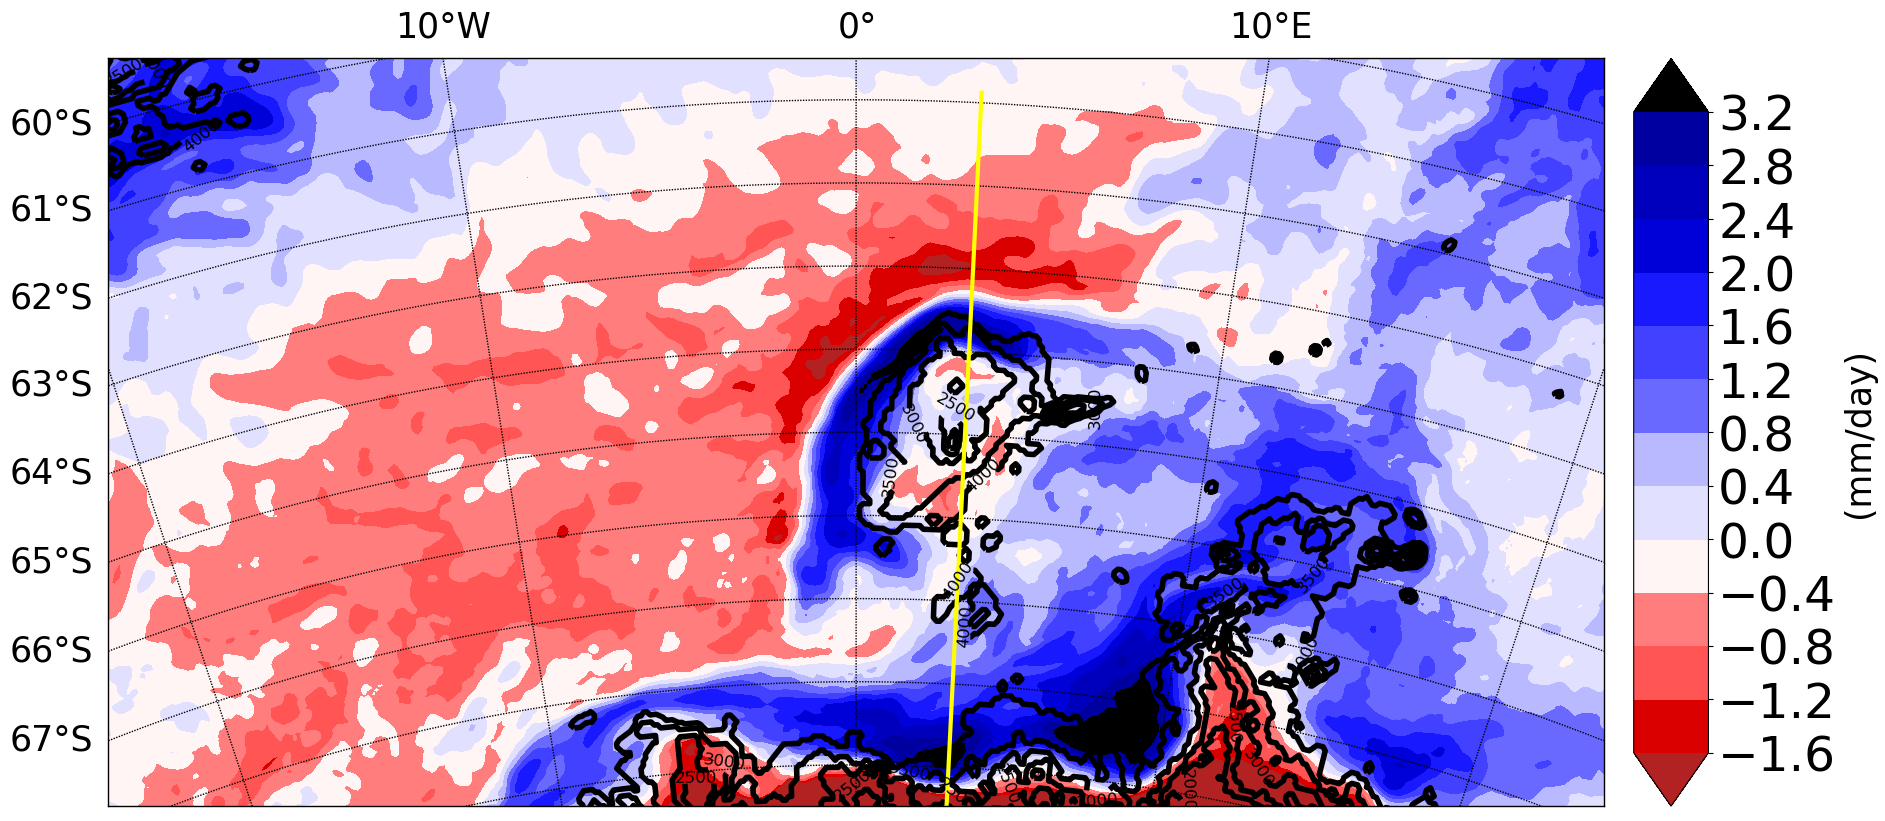

In [17]:
##################################################################
        fig = plt.figure(figsize=(20,30), dpi=100)
        ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.4],
                    xticklabels=[])
        nice_cmap=plt.get_cmap('seismic')
        lev_cmap = nice_cmap([210,170,160,150,130,120,110,100,90,\
                             80,70,60,50,40,30,20])
        new_cmap = cols.ListedColormap(lev_cmap,"seismic")

        nice_levels = [-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2.0,2.4,2.8,3.2] 
        norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
        #********************************************************************nice_levels = [-4,-3,-2,-1,0,1,2,3,4]    
        nice_levels2 = [2000,2500,3000,3500,4000]
        #plt.figure(figsize=(25,20))
        my_font = {'fontname':'Cambria', 'size':'25'}

        map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 2000000,height = 1000000,resolution ='h') 
        map.drawcoastlines()
        map.fillcontinents(color = 'grey')
        map.drawmapboundary(color='black')
 
        map.drawparallels(np.arange(-90,91,1),labels=[1,0,0,0],**my_font)
        map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)
        x2,y2=map(lont2,latt2)
        map.plot(x2,y2,'yellow',linewidth=3)
       
        xq,yq=map(lontu,lattu)
  
        CS = map.contour(xq,yq,plotvar,levels = nice_levels2,colors= 'black',linestyles = 'solid',linewidths=4)
        plt.clabel(CS,fontsize=12,fmt='%4d')
        x,y=map(lont,latt)
        CP2 = map.contourf(x,y,-aveplot*10,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
        CP2.cmap.set_over('black')
        CP2.cmap.set_under('firebrick')
        cbar =map.colorbar(CP2,extendfrac='auto',ticks=nice_levels)
        cbar.ax.tick_params(labelsize=35)
        cbar.set_label('(mm/day)', **my_font)
        plt.savefig("salintiy.png",bbox_inches='tight')